# Simple linear regression - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression (similar to the one in the lecture), using the new data. 

Apart from that, please:
-  Create a scatter plot (with or without a regression line)
-  Calculate the R-squared
-  Display the intercept and coefficient(s)
-  Using the model make a prediction about an apartment with size 750 sq.ft.

Note: In this exercise, the dependent variable is 'price', while the independent variable is 'size'.

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

## Load the data

In [2]:
data = pd.read_csv('real_estate_price_size.csv')

In [3]:
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [4]:
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


## Create the regression

### Declare the dependent and the independent variables

In [5]:
x = data['size']
y = data['price']

### Explore the data

An alternative to exploring the data:
plt.scatter(x,y)
plt.xlabel('Size',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()

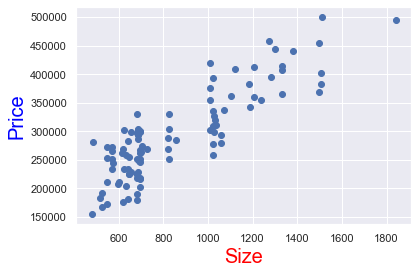

In [6]:
plt.scatter(x,y)
plt.xlabel('Size' , color = 'red', fontsize = 20)
plt.ylabel('Price', color = 'blue', fontsize = 20)
plt.show()

In [7]:
x.shape

(100,)

In [8]:
y.shape

(100,)

To transform the inputs into a matrix (2D object), we may also use:
x_matrix = x.values.reshape(100,1)
y_matrix = y.values.reshape(100,1)

### Transform the inputs into a matrix (2D object)

In [9]:
x_matrix = x.values.reshape(-1,1)

In [10]:
x_matrix.shape

(100, 1)

### Regression itself

In [11]:
reg = LinearRegression()
reg.fit(x_matrix,y)

LinearRegression()

In [12]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

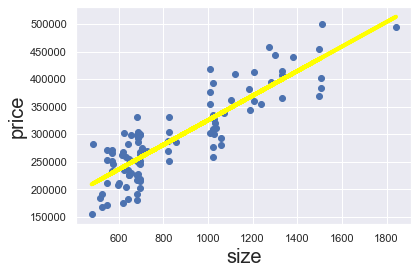

In [13]:
plt.scatter(x,y)
yhat = reg.coef_ * x_matrix + reg.intercept_
fig = plt.plot(x, yhat, lw = 4, c = 'yellow', label = 'regression line')
plt.xlabel('size', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.show()

### Calculate the R-squared

In [14]:
reg.score(x_matrix, y)

0.7447391865847586

### Find the intercept

In [15]:
reg.intercept_

101912.60180122897

### Find the coefficients

In [16]:
reg.coef_

array([223.17874259])

Now that we know the values, we can just plunge them in to create the scatter plot again.

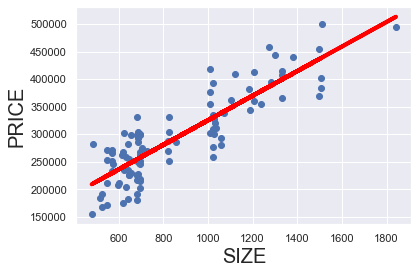

In [17]:
plt.scatter(x,y)
yhat = 223.1787 * x_matrix + 101912.6018
fig = plt.plot(x, yhat, lw = 4, c = 'red', label = 'Regression Line')
plt.xlabel('SIZE', fontsize = 20)
plt.ylabel('PRICE', fontsize = 20)
plt.show()

### Making predictions

You find an apartment online with a size of 750 sq.ft.

All else equal what should be its price according to the model?

In [18]:
reg.predict(750)

ValueError: Expected 2D array, got scalar array instead:
array=750.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [19]:
x1 = [750]
x1 = x1.reshape(1, -1)
reg.predict(x1)

AttributeError: 'list' object has no attribute 'reshape'

In [20]:
reg.predict([[750]])

array([269296.65874718])

ANOTHER ALTERNATIVE TO CHANGE 750 TO 2D IS GIVEN BELOW:

In [21]:
x2 = pd.DataFrame(data = [750], columns = ['size'])
x2

,size
0,750


In [22]:
reg.predict(x2)

array([269296.65874718])